<a href="https://colab.research.google.com/github/ivelin/canswim/blob/main/canswim_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an experimental attempt to implement growth stock indicators in support of CANSLIM style investors and traders.

In [2]:
pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


Check whether GPU is available

In [3]:
import torch
torch.cuda.is_available()

False

Explore stock market dataset from Yahoo Finance

In [4]:
import yfinance as yf

msft = yf.Ticker("MSFT")
print(msft)
"""
returns
<yfinance.Ticker object at 0x1a1715e898>
"""


yfinance.Ticker object <MSFT>


'\nreturns\n<yfinance.Ticker object at 0x1a1715e898>\n'

In [ ]:
import json

# get stock info
print(json.dumps(msft.info, indent=2))

"""
returns:
{
 'quoteType': 'EQUITY',
 'quoteSourceName': 'Nasdaq Real Time Price',
 'currency': 'USD',
 'shortName': 'Microsoft Corporation',
 'exchangeTimezoneName': 'America/New_York',
  ...
 'symbol': 'MSFT'
}
"""


In [6]:

# get historical market data
msft_hist = msft.history(period="max")
print(msft_hist)
"""
returns:
              Open    High    Low    Close      Volume  Dividends  Splits
Date
1986-03-13    0.06    0.07    0.06    0.07  1031788800        0.0     0.0
1986-03-14    0.07    0.07    0.07    0.07   308160000        0.0     0.0
...
2019-04-15  120.94  121.58  120.57  121.05    15792600        0.0     0.0
2019-04-16  121.64  121.65  120.10  120.77    14059700        0.0     0.0
"""


                                 Open        High         Low       Close  \
Date                                                                        
1986-03-13 00:00:00-05:00    0.054893    0.062965    0.054893    0.060274   
1986-03-14 00:00:00-05:00    0.060274    0.063503    0.060274    0.062427   
1986-03-17 00:00:00-05:00    0.062427    0.064042    0.062427    0.063503   
1986-03-18 00:00:00-05:00    0.063504    0.064042    0.061350    0.061889   
1986-03-19 00:00:00-05:00    0.061889    0.062427    0.060274    0.060812   
...                               ...         ...         ...         ...   
2023-12-26 00:00:00-05:00  375.000000  376.940002  373.500000  374.660004   
2023-12-27 00:00:00-05:00  373.690002  375.059998  372.809998  374.070007   
2023-12-28 00:00:00-05:00  375.369995  376.459991  374.160004  375.279999   
2023-12-29 00:00:00-05:00  376.000000  377.160004  373.480011  376.040009   
2024-01-02 00:00:00-05:00  373.859985  375.899994  366.770996  367.504700   

'\nreturns:\n              Open    High    Low    Close      Volume  Dividends  Splits\nDate\n1986-03-13    0.06    0.07    0.06    0.07  1031788800        0.0     0.0\n1986-03-14    0.07    0.07    0.07    0.07   308160000        0.0     0.0\n...\n2019-04-15  120.94  121.58  120.57  121.05    15792600        0.0     0.0\n2019-04-16  121.64  121.65  120.10  120.77    14059700        0.0     0.0\n'

In [7]:
# show actions (dividends, splits)
print(msft.actions)
"""
returns:
            Dividends  Splits
Date
1987-09-21       0.00     2.0
1990-04-16       0.00     2.0
...
2018-11-14       0.46     0.0
2019-02-20       0.46     0.0
"""

                           Dividends  Stock Splits
Date                                              
1987-09-21 00:00:00-04:00       0.00           2.0
1990-04-16 00:00:00-04:00       0.00           2.0
1991-06-27 00:00:00-04:00       0.00           1.5
1992-06-15 00:00:00-04:00       0.00           1.5
1994-05-23 00:00:00-04:00       0.00           2.0
...                              ...           ...
2022-11-16 00:00:00-05:00       0.68           0.0
2023-02-15 00:00:00-05:00       0.68           0.0
2023-05-17 00:00:00-04:00       0.68           0.0
2023-08-16 00:00:00-04:00       0.68           0.0
2023-11-15 00:00:00-05:00       0.75           0.0

[89 rows x 2 columns]


'\nreturns:\n            Dividends  Splits\nDate\n1987-09-21       0.00     2.0\n1990-04-16       0.00     2.0\n...\n2018-11-14       0.46     0.0\n2019-02-20       0.46     0.0\n'

In [8]:

# show dividends
print(msft.dividends)
"""
returns:
Date
2003-02-19    0.08
2003-10-15    0.16
...
2018-11-14    0.46
2019-02-20    0.46
"""

Date
2003-02-19 00:00:00-05:00    0.08
2003-10-15 00:00:00-04:00    0.16
2004-08-23 00:00:00-04:00    0.08
2004-11-15 00:00:00-05:00    3.08
2005-02-15 00:00:00-05:00    0.08
                             ... 
2022-11-16 00:00:00-05:00    0.68
2023-02-15 00:00:00-05:00    0.68
2023-05-17 00:00:00-04:00    0.68
2023-08-16 00:00:00-04:00    0.68
2023-11-15 00:00:00-05:00    0.75
Name: Dividends, Length: 80, dtype: float64


'\nreturns:\nDate\n2003-02-19    0.08\n2003-10-15    0.16\n...\n2018-11-14    0.46\n2019-02-20    0.46\n'

In [9]:
# show splits
print(msft.splits)
"""
returns:
Date
1987-09-21    2.0
1990-04-16    2.0
...
1999-03-29    2.0
2003-02-18    2.0
"""

Date
1987-09-21 00:00:00-04:00    2.0
1990-04-16 00:00:00-04:00    2.0
1991-06-27 00:00:00-04:00    1.5
1992-06-15 00:00:00-04:00    1.5
1994-05-23 00:00:00-04:00    2.0
1996-12-09 00:00:00-05:00    2.0
1998-02-23 00:00:00-05:00    2.0
1999-03-29 00:00:00-05:00    2.0
2003-02-18 00:00:00-05:00    2.0
Name: Stock Splits, dtype: float64


'\nreturns:\nDate\n1987-09-21    2.0\n1990-04-16    2.0\n...\n1999-03-29    2.0\n2003-02-18    2.0\n'

Ingest data into darts timeseries

In [10]:
msft_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054893,0.062965,0.054893,0.060274,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060274,0.063503,0.060274,0.062427,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062427,0.064042,0.062427,0.063503,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063504,0.064042,0.061350,0.061889,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061889,0.062427,0.060274,0.060812,47894400,0.0,0.0


In [11]:
msft_hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-26 00:00:00-05:00,375.000000,376.940002,373.500000,374.660004,12673100,0.0,0.0
2023-12-27 00:00:00-05:00,373.690002,375.059998,372.809998,374.070007,14905400,0.0,0.0
2023-12-28 00:00:00-05:00,375.369995,376.459991,374.160004,375.279999,14327000,0.0,0.0
2023-12-29 00:00:00-05:00,376.000000,377.160004,373.480011,376.040009,18723000,0.0,0.0
2024-01-02 00:00:00-05:00,373.859985,375.899994,366.770996,367.504700,7736049,0.0,0.0


In [12]:
df=msft_hist
# df=msft_hist.reset_index(drop=True)
# data['Date']=pd.to_datetime(data['Date'])
print(len(df))
df.head()

9528


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054893,0.062965,0.054893,0.060274,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060274,0.063503,0.060274,0.062427,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062427,0.064042,0.062427,0.063503,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063504,0.064042,0.061350,0.061889,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061889,0.062427,0.060274,0.060812,47894400,0.0,0.0


In [15]:
# Count rows without values
# https://stackoverflow.com/questions/28199524/best-way-to-count-the-number-of-rows-with-missing-values-in-a-pandas-dataframe
df.shape[0] - df.dropna().shape[0]



0

In [16]:
# count any cells without values
df.isnull().values.ravel().sum()

0

In [14]:
# fill in missing values
# df=df.interpolate()
# df

In [47]:
import pandas as pd
from darts import TimeSeries

# df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv')

series = TimeSeries.from_dataframe(df, value_cols=['Close'], fill_missing_dates=True, freq='B') # , "Open", "High", "Low", "Close", "Volume", "Dividends", "Splits", "Date")


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(America/New_York)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


In [48]:
# get regularized time series with NaN fill-ins
reg_df = series.pd_dataframe()

In [49]:
# get number of rows without values
reg_df.shape[0] - reg_df.dropna().shape[0]

336

In [50]:
# fill in missing values
reg_df = reg_df.interpolate()


In [51]:
# Check again number of rows without values. Should be 0.
reg_df.shape[0] - reg_df.dropna().shape[0]

0

In [52]:
# update series with new regularized dates and values
series = TimeSeries.from_dataframe(reg_df)

Prepare train and validation splits

In [53]:
train, val = series.split_before(pd.Timestamp('2023-05-25'))


In [54]:
len(train), len(val)

(9705, 159)

In [55]:
train.head()

<TimeSeries (DataArray) (Date: 5, component: 1, sample: 1)>
array([[[0.0602741 ]],

       [[0.06242662]],

       [[0.06350347]],

       [[0.0618885 ]],

       [[0.06081226]]])
Coordinates:
  * Date       (Date) datetime64[ns] 1986-03-13 1986-03-14 ... 1986-03-19
  * component  (component) object 'Close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [56]:
train_df = train.pd_dataframe()


In [58]:
train_df.shape[0] - train_df.dropna().shape[0]

0

In [59]:
val.head()

<TimeSeries (DataArray) (Date: 5, component: 1, sample: 1)>
array([[[324.57263184]],

       [[331.51385498]],

       [[330.67730713]],

       [[329.84075928]],

       [[327.03244019]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2023-05-25 2023-05-26 ... 2023-05-31
  * component  (component) object 'Close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [60]:
val_df = val.pd_dataframe()
val_df

component,Close
Date,
2023-05-25,324.572632
2023-05-26,331.513855
2023-05-29,330.677307
2023-05-30,329.840759
2023-05-31,327.032440
...,...
2023-12-27,374.070007
2023-12-28,375.279999
2023-12-29,376.040009


In [62]:
val_df.shape[0] - val_df.dropna().shape[0]

0

Plot data splits

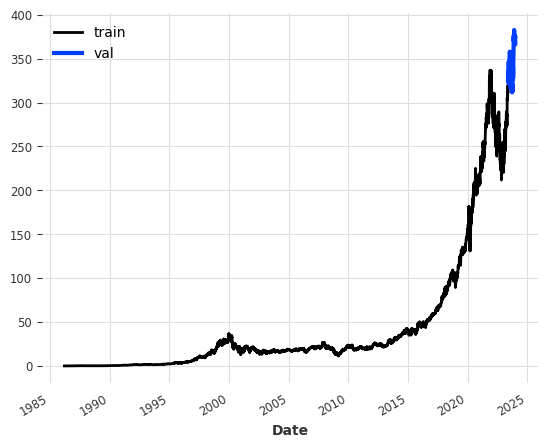

In [63]:
import matplotlib.pyplot as plt
 
train.plot(label='train')
val.plot(label='val', lw=3)
plt.legend()

Show seasonalities

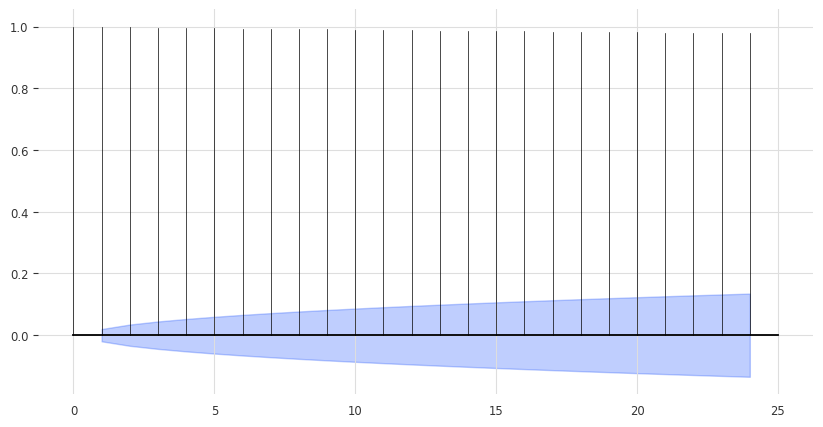

In [64]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, alpha=0.05)

In [65]:
from darts.models import ExponentialSmoothing


model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

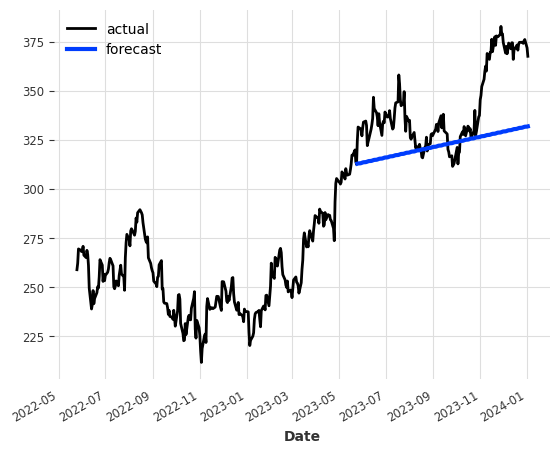

In [76]:
import matplotlib.pyplot as plt
 

actual = series.slice(pd.Timestamp('2022-05-25'), series.end_time())
actual.plot(label='actual')
prediction.plot(label='forecast', lw=3)
plt.legend()

In [68]:
from darts.models import AutoARIMA
#  
model_aarima = AutoARIMA()
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

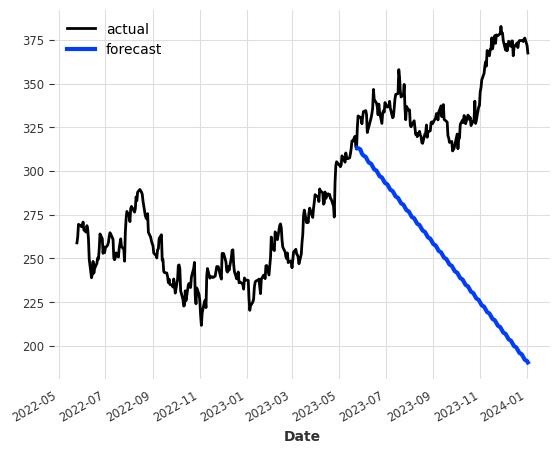

In [77]:
import matplotlib.pyplot as plt
 
actual.plot(label='actual')
prediction_aarima.plot(label='forecast', lw=3)
plt.legend()

In [122]:
#from darts.dataprocessing.transformers import Scaler
# 
#scaler = Scaler()
#train_air_scaled = scaler.fit_transform(train)
# 
#train_air_scaled.plot()
# 
encoders = {"datetime_attribute": {"past": ["month", "year"]}} # , "transformer": Scaler()}

In [183]:
train_history = 252 # 252 days in a year with market data
pred_horizon = 21*2 # 21 days in a month with market data
n_epochs = 20 # model training epochs

In [184]:
from darts.models import TiDEModel

saved_model_name = 'canswim_model'

# If available, load the saved model state that performed best on validation set
try:
  print('Loading saved model')
  model =TiDEModel.load_from_checkpoint(model_name=saved_model_name, best=True)
except ValueError as e:
  print('Error loading saved model:', e)
  print('Proceeding with new model')
  model = TiDEModel(
      input_chunk_length=train_history,
      output_chunk_length=pred_horizon,
      add_encoders=encoders,
      n_epochs=n_epochs,
      use_reversible_instance_norm=True,
      model_name=saved_model_name,
#      force_reset=True,
      save_checkpoints=True,    
  )  



ValueError: Could not find base model save file `_model.pth.tar` in /home/ivelin/canswim/darts_logs/canswim_model.


Loading saved model
Error loading saved model: Could not find base model save file `_model.pth.tar` in /home/ivelin/canswim/darts_logs/canswim_model.
Proceeding with new model


In [185]:
from darts.models import RegressionModel
from darts.models.forecasting.forecasting_model import GlobalForecastingModel

# when True, multiple time series are supported
supports_multi_ts = issubclass(model.__class__, GlobalForecastingModel)

In [186]:
supports_multi_ts

True

In [187]:
# train model

model.fit(train)


number of `past_covariates` features is <= `temporal_width_past`, leading to feature expansion.number of covariates: 2, `temporal_width_past=4`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type             | Params
---------------------------------------------------------
0 | criterion           | MSELoss          | 0     
1 | train_metrics       | MetricCollection | 0     
2 | val_metrics         | MetricCollection | 0     
3 | rin                 | RINorm           | 2     
4 | past_cov_projection | _ResidualBlock   | 912   
5 | encoders            | Sequential       | 339 K 
6 | decoders            | Sequential       | 189 K 
7 | temporal_decoder    | _ResidualBlock   | 594   
8 | lookback_skip       | Linear           | 10.6 K
---------------------------------------------------------
541 K     Trainable params
0         Non-trainable params
541 K     Tot

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


TiDEModel(num_encoder_layers=1, num_decoder_layers=1, decoder_output_dim=16, hidden_size=128, temporal_width_past=4, temporal_width_future=4, temporal_decoder_hidden=32, use_layer_norm=False, dropout=0.1, use_static_covariates=True, input_chunk_length=252, output_chunk_length=42, add_encoders={'datetime_attribute': {'past': ['month', 'year']}}, n_epochs=20, use_reversible_instance_norm=True, model_name=canswim_model, save_checkpoints=True)

In [188]:
pred = model.predict(pred_horizon) # len(val))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

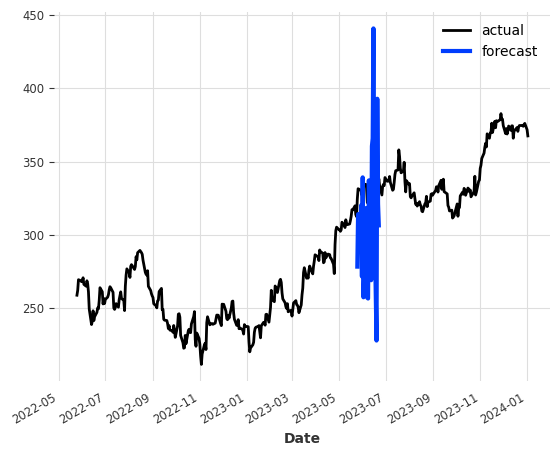

In [158]:
actual.plot(label='actual')
pred.plot(label='forecast', lw=3)
plt.legend()

In [92]:
from darts.models import TiDEModel

model_tide_scaled = TiDEModel(
    input_chunk_length=252,
    output_chunk_length=21,
    add_encoders=encoders,
    n_epochs=10,
    use_reversible_instance_norm=True
)

model_tide_scaled.fit(train_air_scaled)
pred_tide_scaled= model_tide_scaled.predict(len(val))


number of `past_covariates` features is <= `temporal_width_past`, leading to feature expansion.number of covariates: 2, `temporal_width_past=4`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type             | Params
---------------------------------------------------------
0 | criterion           | MSELoss          | 0     
1 | train_metrics       | MetricCollection | 0     
2 | val_metrics         | MetricCollection | 0     
3 | rin                 | RINorm           | 2     
4 | past_cov_projection | _ResidualBlock   | 912   
5 | encoders            | Sequential       | 339 K 
6 | decoders            | Sequential       | 103 K 
7 | temporal_decoder    | _ResidualBlock   | 594   
8 | lookback_skip       | Linear           | 5.3 K 
---------------------------------------------------------
449 K     Trainable params
0         Non-trainable params
449 K     Tot

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

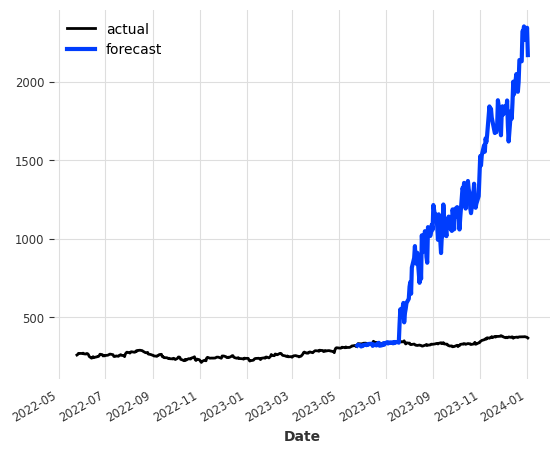

In [90]:
actual.plot(label='actual')

# scale back:
pred_tide_scaled = scaler.inverse_transform(pred_tide_scaled)

pred_tide_scaled.plot(label='forecast', lw=3)
plt.legend()

In [ ]:

models = [ExponentialSmoothing(),
#          NHiTSModel(input_chunk_length=6,
#            output_chunk_length=6),
          TiDEModel(
            input_chunk_length=24,
            output_chunk_length=12),
          TiDEModel(
            input_chunk_length=24,
            output_chunk_length=12,
            use_reversible_instance_norm=True),
            ]

backtests = [model.historical_forecasts(series,
                            start=.5,
                            forecast_horizon=3)
             for model in models]

In [ ]:
from darts.metrics import mape

series.plot(label='data')
for i, m in enumerate(models):
    err = mape(backtests[i], series)
    backtests[i].plot(lw=3, label='{}, MAPE={:.2f}%'.format(m, err))

plt.title('Backtests with 3-months forecast horizon')
plt.legend()